In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style="darkgrid")# "whitegrid")
%matplotlib inline 

In [2]:
df_train = pd.read_csv("https://raw.githubusercontent.com/atulpatelDS/Data_Files/master/Loan_Dataset/loan_data_set.csv")
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df_train = df_train.set_index("Loan_ID")
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
y = targets = labels = output_var = df_train["Loan_Status"]
x = predictors = input_var = df_train.loc[:,df_train.columns != "Loan_Status"]

In [5]:
y.head()

Loan_ID
LP001002    Y
LP001003    N
LP001005    Y
LP001006    Y
LP001008    Y
Name: Loan_Status, dtype: object

In [6]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [7]:
print("Input Variables", list(x.columns))
print("Output Variable", "['Loan_Status']")

Input Variables ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
Output Variable ['Loan_Status']


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [9]:
datatype = df_train.dtypes
col = datatype[(datatype == 'object') | (datatype == 'int64')| (datatype == 'float64')].index.tolist()
num_col = datatype[(datatype == 'float64') | (datatype == 'int64')].index.tolist()
cat_col = datatype[(datatype == 'object')].index.tolist()
print("Categorical Columns :",cat_col)
print("Numerical Columns :",num_col)

Categorical Columns : ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
Numerical Columns : ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [10]:
df_train.sample()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y


In [11]:
df_train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

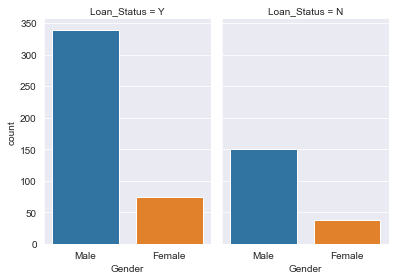

In [12]:
sns.catplot(x="Gender",col="Loan_Status",data=df_train, kind="count",height=4, aspect=.7)

In [13]:
per_sur_nonsur = (df_train["Loan_Status"].value_counts()/df_train.shape[0]*100).round(2)
per_sur_nonsur

Y    68.73
N    31.27
Name: Loan_Status, dtype: float64

In [14]:
df_train["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

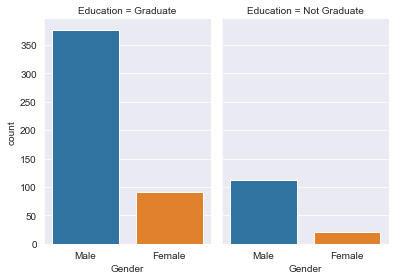

In [15]:
sns.catplot(x="Gender",col="Education",data=df_train, kind="count",height=4, aspect=.7)

In [16]:
per_sur_nonsur = (df_train["Education"].value_counts()/df_train.shape[0]*100).round(2)
per_sur_nonsur

Graduate        78.18
Not Graduate    21.82
Name: Education, dtype: float64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

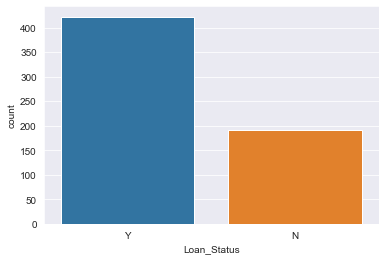

In [17]:
sns.countplot(data=df_train,x="Loan_Status")

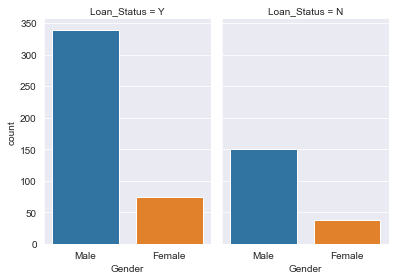

In [18]:
sns.catplot(x="Gender",col="Loan_Status",data=df_train, kind="count",height=4, aspect=.7)

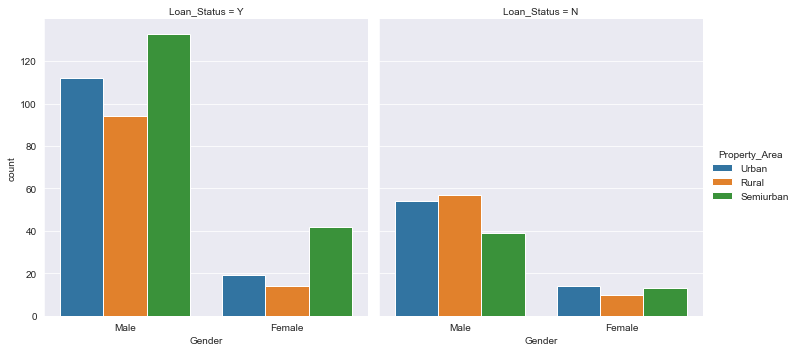

In [19]:
sns.catplot(data=df_train,col = "Loan_Status",x = "Gender", hue="Property_Area",kind = "count")

<AxesSubplot:>

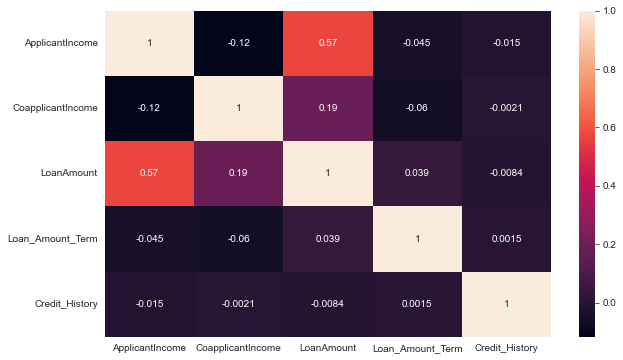

In [20]:
## Co-relation matrix
fig,ax = plt.subplots(figsize = (10,6))
corr = df_train.corr()
sns.heatmap(corr,annot=True)

In [21]:
df_train.duplicated().sum()

0

In [22]:
percent_missing = df_train.isnull().sum() * 100 / len(df_train)
missing_value_df = pd.DataFrame({'column_name': df_train.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Gender,Gender,2.117264
Married,Married,0.488599
Dependents,Dependents,2.442997
Education,Education,0.000000
Self_Employed,Self_Employed,5.211726
ApplicantIncome,ApplicantIncome,0.000000
CoapplicantIncome,CoapplicantIncome,0.000000
LoanAmount,LoanAmount,3.583062
Loan_Amount_Term,Loan_Amount_Term,2.280130
Credit_History,Credit_History,8.143322


In [23]:
df_train.dropna(inplace=True)
df_train.drop(labels=["Loan_Status"],axis=1,inplace=True)
df_train.reset_index(drop=True,inplace=True)

In [24]:
percent_missing = df_train.isnull().sum() * 100 / len(df_train)
missing_value_df = pd.DataFrame({'column_name': df_train.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Gender,Gender,0.0
Married,Married,0.0
Dependents,Dependents,0.0
Education,Education,0.0
Self_Employed,Self_Employed,0.0
ApplicantIncome,ApplicantIncome,0.0
CoapplicantIncome,CoapplicantIncome,0.0
LoanAmount,LoanAmount,0.0
Loan_Amount_Term,Loan_Amount_Term,0.0
Credit_History,Credit_History,0.0
